In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

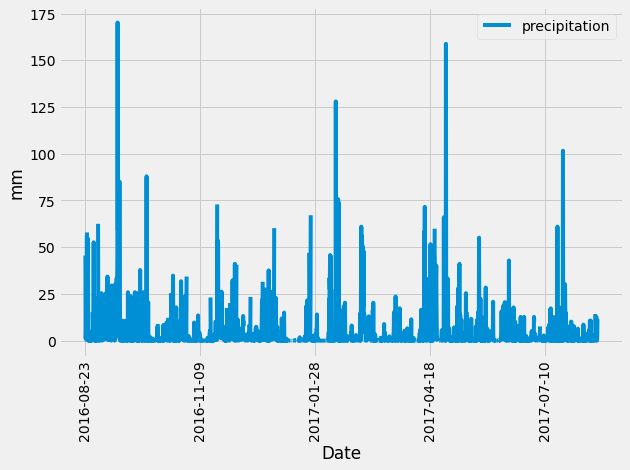

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - relativedelta(years=1)

# Perform a query to retrieve the data and precipitation scores
date_prcp = session.query(measurement.date, measurement.prcp).filter(measurement.date >= query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
date_prcp_df = pd.DataFrame(date_prcp, columns=['date', 'precipitation']).set_index('date')

# Sort the dataframe by date
date_prcp_df = date_prcp_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
date_prcp_df.plot(figsize=(9, 6))
plt.xlabel('Date')
plt.ylabel('mm')
plt.xticks(rotation=90)
plt.show()



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prcp_df.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
number_of_stations = session.query(station.id).count()
number_of_stations

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
                  order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_temp = session.query(func.min(measurement.tobs)).filter(measurement.station=='USC00519281').all()

high_temp = session.query(func.max(measurement.tobs)).filter(measurement.station=='USC00519281').all()

avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()


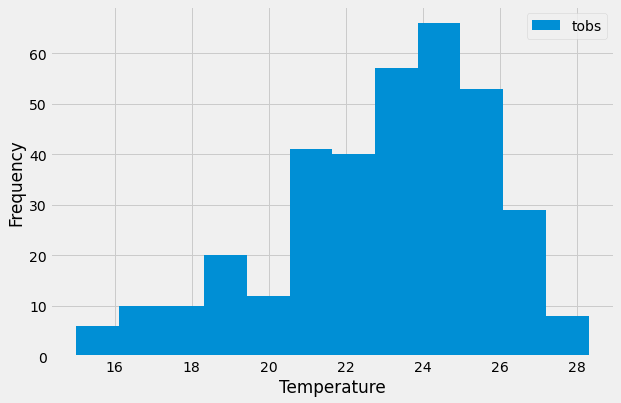

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs = session.query(measurement.tobs).filter(measurement.date >= query_date)\
       .filter(measurement.station=='USC00519281').all()
tobs_df = pd.DataFrame(tobs, columns=['tobs'])
tobs_df.plot.hist(bins=12, figsize=(9,6))
plt.xlabel('Temperature')
plt.show()

# Close session

In [16]:
# Close Session
session.close()